# Content Based Movie-Recommender-System

#### All movies are not included, only those movies having popularity>=5, rating >5, year span 2000-2024 

### Importing basic Libraries

In [125]:
import numpy as np
import pandas as pd

### Reading the csv file

In [2]:
df=pd.read_csv('TMDB_movie_dataset_v11.csv')

df.head()

### Visualization and Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012365 entries, 0 to 1012364
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1012365 non-null  int64  
 1   title                 1012353 non-null  object 
 2   vote_average          1012365 non-null  float64
 3   vote_count            1012365 non-null  int64  
 4   status                1012365 non-null  object 
 5   release_date          891444 non-null   object 
 6   revenue               1012365 non-null  int64  
 7   runtime               1012365 non-null  int64  
 8   adult                 1012365 non-null  bool   
 9   backdrop_path         285326 non-null   object 
 10  budget                1012365 non-null  int64  
 11  homepage              109567 non-null   object 
 12  imdb_id               574684 non-null   object 
 13  original_language     1012365 non-null  object 
 14  original_title        1012353 non-

In [4]:
df.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            120921
revenue                      0
runtime                      0
adult                        0
backdrop_path           727039
budget                       0
homepage                902798
imdb_id                 437681
original_language            0
original_title              12
overview                184938
popularity                   0
poster_path             283414
tagline                 867329
genres                  376015
production_companies    532719
production_countries    414972
spoken_languages        404389
dtype: int64

In [5]:
df.duplicated().sum()

11

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [9]:
df['tagline'][:10].values

array(['Your mind is the scene of the crime.',
       'Mankind was born on Earth. It was never meant to die here.',
       'Welcome to a world without rules.', 'Enter the world of Pandora.',
       'Some assembly required.',
       'Witness the beginning of a happy ending.',
       'An entire universe. Once and for all.', 'Mischief. Mayhem. Soap.',
       'All heroes start somewhere.',
       "Just because you are a character doesn't mean you have character."],
      dtype=object)

In [10]:
np.round(df['vote_count'].describe(),3)

count    1012354.000
mean          21.184
std          337.424
min            0.000
25%            0.000
50%            0.000
75%            1.000
max        34495.000
Name: vote_count, dtype: float64

In [11]:
np.round(df['popularity'].describe(),3)

count    1012354.000
mean           1.338
std            8.032
min            0.000
25%            0.600
50%            0.600
75%            0.907
max         2994.357
Name: popularity, dtype: float64

### Till now, Considering Important Columns according to domain knowledge

In [12]:
df=df[['id', 'title', 'vote_average','release_date','overview',
       'popularity', 'genres','imdb_id','poster_path']]

In [13]:
df.head()

,id,title,vote_average,release_date,overview,popularity,genres,imdb_id,poster_path
0,27205,Inception,8.364,2010-07-15,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,2014-11-05,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,2008-07-16,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,2009-12-15,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,2012-04-25,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012354 entries, 0 to 1012364
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1012354 non-null  int64  
 1   title         1012342 non-null  object 
 2   vote_average  1012354 non-null  float64
 3   release_date  891436 non-null   object 
 4   overview      827418 non-null   object 
 5   popularity    1012354 non-null  float64
 6   genres        636348 non-null   object 
 7   imdb_id       574684 non-null   object 
 8   poster_path   728946 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 77.2+ MB


In [15]:
df.isnull().sum()

id                   0
title               12
vote_average         0
release_date    120918
overview        184936
popularity           0
genres          376006
imdb_id         437670
poster_path     283408
dtype: int64

In [16]:
df = df.dropna(subset=['genres'])

In [17]:
df.isnull().sum()

id                   0
title                5
vote_average         0
release_date     30275
overview        101525
popularity           0
genres               0
imdb_id         197644
poster_path     131108
dtype: int64

In [18]:
df = df.dropna(subset=['overview'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534823 entries, 0 to 1012361
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            534823 non-null  int64  
 1   title         534822 non-null  object 
 2   vote_average  534823 non-null  float64
 3   release_date  512207 non-null  object 
 4   overview      534823 non-null  object 
 5   popularity    534823 non-null  float64
 6   genres        534823 non-null  object 
 7   imdb_id       390646 non-null  object 
 8   poster_path   437176 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 40.8+ MB


In [20]:
df.isnull().sum()

id                   0
title                1
vote_average         0
release_date     22616
overview             0
popularity           0
genres               0
imdb_id         144177
poster_path      97647
dtype: int64

In [21]:
df = df.dropna(subset=['imdb_id','poster_path'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332807 entries, 0 to 1012346
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            332807 non-null  int64  
 1   title         332807 non-null  object 
 2   vote_average  332807 non-null  float64
 3   release_date  327783 non-null  object 
 4   overview      332807 non-null  object 
 5   popularity    332807 non-null  float64
 6   genres        332807 non-null  object 
 7   imdb_id       332807 non-null  object 
 8   poster_path   332807 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 25.4+ MB


In [23]:
df.isnull().sum()

id                 0
title              0
vote_average       0
release_date    5024
overview           0
popularity         0
genres             0
imdb_id            0
poster_path        0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332807 entries, 0 to 1012346
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            332807 non-null  int64  
 1   title         332807 non-null  object 
 2   vote_average  332807 non-null  float64
 3   release_date  327783 non-null  object 
 4   overview      332807 non-null  object 
 5   popularity    332807 non-null  float64
 6   genres        332807 non-null  object 
 7   imdb_id       332807 non-null  object 
 8   poster_path   332807 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 25.4+ MB


In [25]:
df.isnull().sum()

id                 0
title              0
vote_average       0
release_date    5024
overview           0
popularity         0
genres             0
imdb_id            0
poster_path        0
dtype: int64

In [26]:
df=df.dropna()

### Dropped all rows containing any null values

In [27]:
df.isnull().sum()

id              0
title           0
vote_average    0
release_date    0
overview        0
popularity      0
genres          0
imdb_id         0
poster_path     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327783 entries, 0 to 1012346
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            327783 non-null  int64  
 1   title         327783 non-null  object 
 2   vote_average  327783 non-null  float64
 3   release_date  327783 non-null  object 
 4   overview      327783 non-null  object 
 5   popularity    327783 non-null  float64
 6   genres        327783 non-null  object 
 7   imdb_id       327783 non-null  object 
 8   poster_path   327783 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 25.0+ MB


### Function to extract Year from relase_date

In [29]:
def extract_year(date_obj):
        date_str = str(date_obj)  # Convert date object to string
        year = int(date_str[:4])  # Extracting the first four characters as the year
        return year

In [30]:
df['Year']=df['release_date'].apply(extract_year)

In [31]:
df['Year'].describe()

count    327783.000000
mean       1995.662359
std          27.861743
min        1874.000000
25%        1981.000000
50%        2007.000000
75%        2017.000000
max        2099.000000
Name: Year, dtype: float64

In [32]:
len(df[df['Year']>=2025])

29

In [33]:
df=df[df['Year']<2025]

In [34]:

df['Year'].describe()

count    327754.000000
mean       1995.659522
std          27.861055
min        1874.000000
25%        1981.000000
50%        2007.000000
75%        2017.000000
max        2024.000000
Name: Year, dtype: float64

### Visualizations to explore more about year of relase

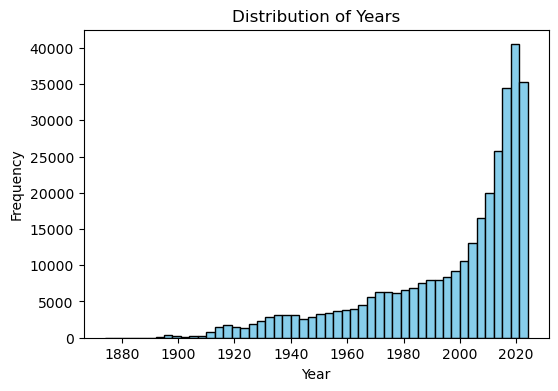

In [35]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Year' is the column containing years
# Replace 'Year' with the actual column name in your DataFrame
year_data = df['Year']

# Plot the distribution
plt.figure(figsize=(6, 4))
plt.hist(year_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

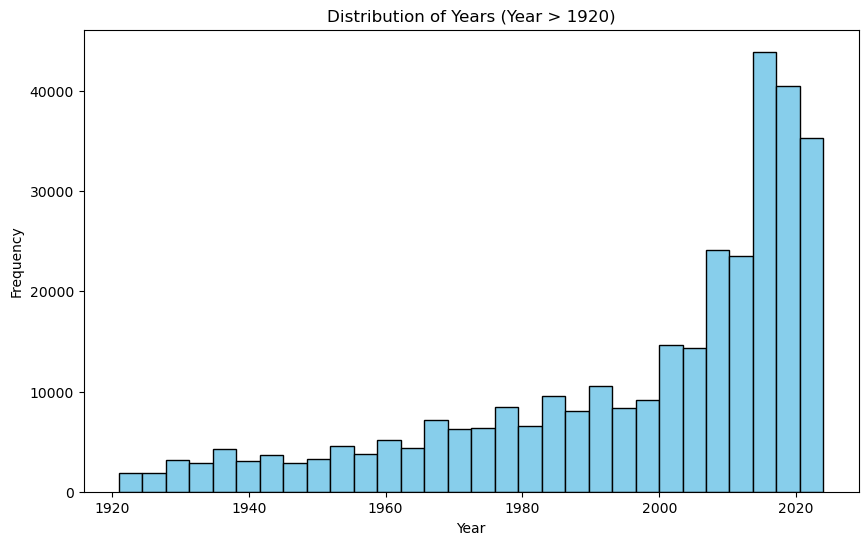

In [36]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only years greater than 1920
filtered_year_data = df[df['Year'] > 1920]['Year']

# Plot the distribution without grid lines
plt.figure(figsize=(10, 6))
plt.hist(filtered_year_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Years (Year > 1920)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid lines
plt.show()

### Final Conclusion regarding the release_year

In [44]:
len(df[df['Year']<2000])

131388

### Considering only those movies which release in 1980 or thereafter

In [45]:
df=df[df['Year']>=2000]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196366 entries, 0 to 1012346
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            196366 non-null  int64  
 1   title         196366 non-null  object 
 2   vote_average  196366 non-null  float64
 3   release_date  196366 non-null  object 
 4   overview      196366 non-null  object 
 5   popularity    196366 non-null  float64
 6   genres        196366 non-null  object 
 7   imdb_id       196366 non-null  object 
 8   poster_path   196366 non-null  object 
 9   Year          196366 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 16.5+ MB


### Dropping finally Year and release_date columns

In [47]:
df=df.drop(columns=['Year','release_date'])

In [48]:
df.head()

,id,title,vote_average,overview,popularity,genres,imdb_id,poster_path
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196366 entries, 0 to 1012346
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            196366 non-null  int64  
 1   title         196366 non-null  object 
 2   vote_average  196366 non-null  float64
 3   overview      196366 non-null  object 
 4   popularity    196366 non-null  float64
 5   genres        196366 non-null  object 
 6   imdb_id       196366 non-null  object 
 7   poster_path   196366 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.5+ MB


### Exploring more about the popularity of the movie 

In [50]:
df['popularity'].describe()

count    196366.000000
mean          2.972655
std          16.500101
min           0.000000
25%           0.600000
50%           0.985000
75%           2.206000
max        2994.357000
Name: popularity, dtype: float64

In [51]:
len(df[df['popularity']==0])

1692

In [52]:
df=df[df['popularity']!=0]

In [53]:
df['popularity'].describe()

count    194674.000000
mean          2.998492
std          16.569314
min           0.600000
25%           0.600000
50%           0.996000
75%           2.226000
max        2994.357000
Name: popularity, dtype: float64

### Final Conclusion regarding the popularity of a movie

In [62]:
len(df[df['popularity']<5])

171977

In [63]:
df=df[df['popularity']>=5]

### Dropping the popularity column

In [64]:
df=df.drop(columns=['popularity'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 1011378
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22697 non-null  int64  
 1   title         22697 non-null  object 
 2   vote_average  22697 non-null  float64
 3   overview      22697 non-null  object 
 4   genres        22697 non-null  object 
 5   imdb_id       22697 non-null  object 
 6   poster_path   22697 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [66]:
df.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


### Exploring vote_average

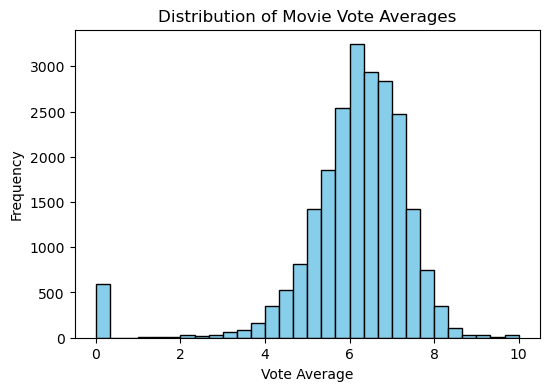

In [67]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'vote_average' is the column containing vote averages
# Replace 'vote_average' with the actual column name in your DataFrame
vote_average_data = df['vote_average']

# Plot the distribution without grid lines
plt.figure(figsize=(6, 4))
plt.hist(vote_average_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid lines
plt.show()


In [68]:
df=df[df['vote_average']!=0]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22106 entries, 0 to 611598
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22106 non-null  int64  
 1   title         22106 non-null  object 
 2   vote_average  22106 non-null  float64
 3   overview      22106 non-null  object 
 4   genres        22106 non-null  object 
 5   imdb_id       22106 non-null  object 
 6   poster_path   22106 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


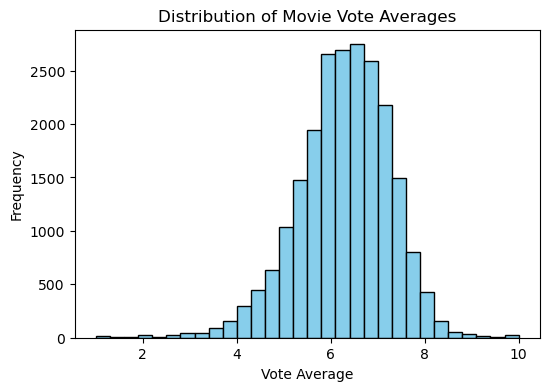

In [70]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'vote_average' is the column containing vote averages
# Replace 'vote_average' with the actual column name in your DataFrame
vote_average_data = df['vote_average']

# Plot the distribution without grid lines
plt.figure(figsize=(6, 4))
plt.hist(vote_average_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid lines
plt.show()


In [71]:
df['vote_average'].describe()

count    22106.000000
mean         6.269975
std          0.984589
min          1.000000
25%          5.696250
50%          6.323000
75%          6.946000
max         10.000000
Name: vote_average, dtype: float64

### Final Conclusion regarding vote_average

In [76]:
len(df[df['vote_average']<5])

2091

In [77]:
df=df[df['vote_average']>5]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19880 entries, 0 to 611598
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19880 non-null  int64  
 1   title         19880 non-null  object 
 2   vote_average  19880 non-null  float64
 3   overview      19880 non-null  object 
 4   genres        19880 non-null  object 
 5   imdb_id       19880 non-null  object 
 6   poster_path   19880 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [79]:
df.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [80]:
df.duplicated().sum()

0

In [81]:
df['title'].duplicated().sum()

734

In [82]:
df= df.drop_duplicates(subset='title')

In [83]:
df['title'].duplicated().sum()

0

In [84]:
df['id'].duplicated().sum()

0

### Final data left after the analysis of various columns

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19146 entries, 0 to 611598
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19146 non-null  int64  
 1   title         19146 non-null  object 
 2   vote_average  19146 non-null  float64
 3   overview      19146 non-null  object 
 4   genres        19146 non-null  object 
 5   imdb_id       19146 non-null  object 
 6   poster_path   19146 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [87]:
df.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [88]:
df.isnull().sum()

id              0
title           0
vote_average    0
overview        0
genres          0
imdb_id         0
poster_path     0
dtype: int64

### Code to extract top 4 casts,director,writer,screenplay name

#### Users mostly watches movies by looking at the name of casts and director mostly, so we will need to extract these informations

#### Since number of data is huge,I will extract these above informations in kaggle colab for faster extraction and will then directly work on the updated data which will contain one additonal column as Cast&Crew column

In [89]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

def get_movie_info(movie_name):
    search_url = "https://api.themoviedb.org/3/search/movie"
    search_params = {'api_key': 'ebfff2fa87a58e69ee7817a7923cde61', 'query': movie_name}
    
    # Retry up to 10 times with exponential backoff
    retries = Retry(total=5, backoff_factor=2)
    adapter = HTTPAdapter(max_retries=retries)
    session = requests.Session()
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    
    try:
        response = session.get(search_url, params=search_params)
        response.raise_for_status()
        movie_data = response.json()
        
        if movie_data['results']:
            # Extract movie ID from the first result and continue fetching credits
            movie_id = movie_data['results'][0]['id']
            credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits"
            credits_params = {'api_key': 'ebfff2fa87a58e69ee7817a7923cde61'}
            response = session.get(credits_url, params=credits_params)
            response.raise_for_status()
            credits_data = response.json()
            
            cast = [actor['name'] for actor in credits_data['cast']]
            crew = {member['job']: member['name'] for member in credits_data['crew']}
            
            # Extract director, writer, and screenplay writer from crew
            director = crew.get('Director', 'Director not found')
            writer = [crew_member['name'] for crew_member in credits_data['crew'] if crew_member['job'] == 'Writer']
            screenplay = [crew_member['name'] for crew_member in credits_data['crew'] if crew_member['job'] == 'Screenplay']
            
            return {'cast': cast[:4], 'director': director, 'writer': writer, 'screenplay': screenplay}
        else:
            return None
    except requests.RequestException as e:
        print("Error:", e)
        return None

# Example usage
movie_name = "Avatar"
movie_info = get_movie_info(movie_name)
if movie_info:
    print("Cast:", movie_info['cast'][:4])
    print("Director:", movie_info['director'])
    print("Writer:", movie_info['writer'])
    print("Screenplay:", movie_info['screenplay'])
else:
    print("Movie not found.")

Cast: ['Sam Worthington', 'Zoe Saldaña', 'Sigourney Weaver', 'Stephen Lang']
Director: James Cameron
Writer: ['James Cameron']
Screenplay: []


### This is what this function returns for a movie 'title'

In [90]:
get_movie_info('Inception')

{'cast': ['Leonardo DiCaprio',
  'Joseph Gordon-Levitt',
  'Ken Watanabe',
  'Tom Hardy'],
 'director': 'Christopher Nolan',
 'writer': ['Christopher Nolan'],
 'screenplay': []}

### Saving the above data to upload it on kaggle colab for Cast&Crew extraction

In [91]:
df.to_csv('data_19146.csv',index=False)

In [92]:
data_19146=pd.read_csv('data_19146.csv')

In [93]:
df.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


### We have now extract Cast&Crew column

In [126]:
import pandas as pd
import numpy as np

In [127]:
df1=pd.read_csv('data_10k.csv')
df1.head()

,Unnamed: 0,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-..."
1,1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"{'cast': ['Matthew McConaughey', 'Anne Hathawa..."
2,2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"{'cast': ['Christian Bale', 'Heath Ledger', 'M..."
3,3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"{'cast': ['Sam Worthington', 'Zoe Saldaña', 'S..."
4,4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"{'cast': ['Robert Downey Jr.', 'Chris Evans', ..."


In [128]:
df2=pd.read_csv('data_20_k.csv')
df2.head()

,Unnamed: 0,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,10000,70590,Singham,6.500,"An honest, small town cop is transferred to a ...","Drama, Action, Crime",tt1948150,/pggLRaurdWwjqX2vkhKIVQSBjXV.jpg,"{'cast': ['Ajay Devgn', 'Kajal Agarwal', 'Prak..."
1,10001,587986,Advantages of Travelling by Train,6.438,After interning her insane husband in a remote...,"Drama, Thriller",tt8406738,/gyxNIAnDZq9f54Up05gDT6ra117.jpg,"{'cast': ['Luis Tosar', 'Pilar Castro', 'Ernes..."
2,10002,524780,Dogs Don't Wear Pants,6.962,Juha has lost his wife in an accident. Years a...,"Drama, Comedy",tt9074574,/47zWqPdURGd5ZfEvjSJIo7R2Esi.jpg,"{'cast': ['Pekka Strang', 'Krista Kosonen', 'I..."
3,10003,33504,Pellet,7.149,El Bola is a 12-year-old boy raised in a viol...,Drama,tt0243794,/i51PMyfiomYL9dw9zcHc3Z7BpjZ.jpg,"{'cast': ['Owl', 'Kazushi Kobayashi', 'Sayaka ..."
4,10004,813726,A Tourist's Guide to Love,6.360,"After an unexpected break up, a travel executi...","Romance, Comedy, Adventure",tt20115096,/uWkpjbBe4gRZilXRXbYfsMUZMhz.jpg,"{'cast': ['Rachael Leigh Cook', 'Scott Ly', 'M..."


In [129]:
movies=pd.concat([df1,df2])

In [130]:
movies.head()

,Unnamed: 0,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-..."
1,1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"{'cast': ['Matthew McConaughey', 'Anne Hathawa..."
2,2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"{'cast': ['Christian Bale', 'Heath Ledger', 'M..."
3,3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"{'cast': ['Sam Worthington', 'Zoe Saldaña', 'S..."
4,4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"{'cast': ['Robert Downey Jr.', 'Chris Evans', ..."


In [131]:
movies = movies.set_index('Unnamed: 0')

In [132]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
Unnamed: 0,,,,,,,,
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-..."
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"{'cast': ['Matthew McConaughey', 'Anne Hathawa..."
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"{'cast': ['Christian Bale', 'Heath Ledger', 'M..."
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"{'cast': ['Sam Worthington', 'Zoe Saldaña', 'S..."
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"{'cast': ['Robert Downey Jr.', 'Chris Evans', ..."


In [133]:
movies.index.name = None
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-..."
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"{'cast': ['Matthew McConaughey', 'Anne Hathawa..."
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"{'cast': ['Christian Bale', 'Heath Ledger', 'M..."
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"{'cast': ['Sam Worthington', 'Zoe Saldaña', 'S..."
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"{'cast': ['Robert Downey Jr.', 'Chris Evans', ..."


In [134]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19146 entries, 0 to 19145
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19146 non-null  int64  
 1   title         19146 non-null  object 
 2   vote_average  19146 non-null  float64
 3   overview      19146 non-null  object 
 4   genres        19146 non-null  object 
 5   imdb_id       19146 non-null  object 
 6   poster_path   19146 non-null  object 
 7   Cast&Crew     19059 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [135]:
movies.isnull().sum()

id               0
title            0
vote_average     0
overview         0
genres           0
imdb_id          0
poster_path      0
Cast&Crew       87
dtype: int64

In [136]:
movies.dropna(inplace=True)

In [137]:
movies.isnull().sum()

id              0
title           0
vote_average    0
overview        0
genres          0
imdb_id         0
poster_path     0
Cast&Crew       0
dtype: int64

In [138]:
movies['Cast&Crew'].duplicated().sum()

385

In [139]:
movies['title'].duplicated().sum()

0

In [140]:
movies[movies['Cast&Crew'].duplicated()]

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
123,285,Pirates of the Caribbean: At World's End,7.239,"Captain Barbossa, long believed to be dead, ha...","Adventure, Fantasy, Action",tt0449088,/jGWpG4YhpQwVmjyHEGkxEkeRf0S.jpg,"{'cast': ['Johnny Depp', 'Orlando Bloom', 'Kei..."
163,131634,The Hunger Games: Mockingjay - Part 2,6.900,"With the nation of Panem in a full scale war, ...","Action, Adventure, Science Fiction",tt1951266,/lImKHDfExAulp16grYm8zD5eONE.jpg,"{'cast': ['Jennifer Lawrence', 'Josh Hutcherso..."
209,338952,Fantastic Beasts: The Crimes of Grindelwald,6.876,Gellert Grindelwald has escaped imprisonment a...,"Fantasy, Adventure, Family",tt4123430,/fMMrl8fD9gRCFJvsx0SuFwkEOop.jpg,"{'cast': ['Eddie Redmayne', 'Katherine Waterst..."
266,605,The Matrix Revolutions,6.710,The human city of Zion defends itself against ...,"Adventure, Action, Thriller, Science Fiction",tt0242653,/qEWiBXJGXK28jGBAm8oFKKTB0WD.jpg,"{'cast': ['Keanu Reeves', 'Laurence Fishburne'..."
385,341174,Fifty Shades Darker,6.492,When a wounded Christian Grey tries to entice ...,"Drama, Romance",tt4465564,/7CBO9GhsUeMSsWQb47WTPZnKjdj.jpg,"{'cast': ['Dakota Johnson', 'Jamie Dornan', 'E..."
...,...,...,...,...,...,...,...,...
19032,964592,Sleep,7.500,A young couple's life is turned upside down wh...,"Horror, Mystery",tt26543426,/hMj3aLl8z3cXJ70LoPLDi1xMcC8.jpg,"{'cast': ['Cary Elwes', 'Dominic Sherwood', 'D..."
19036,822957,AEW Beach Break,8.000,Professional wrestling special episode produce...,TV Movie,tt13887560,/xbyfKwCV4TpXfLxuzwhx8XS0879.jpg,"{'cast': [], 'director': 'Director not found',..."
19095,1105832,Simón,10.000,"Simón, a Venezuelan freedom fighter exiled in ...",Drama,tt13580840,/bRKUU9mbRK6vwp2BZIlaAZCekMz.jpg,"{'cast': ['Christian McGaffney', 'Jana Nawarts..."
19117,1187075,MAD,6.000,Set in an engineering college and revolves aro...,"Comedy, Romance, Drama",tt28820189,/nDpOmgBfQZwOpFBcgokQGqd74r1.jpg,"{'cast': ['Dakota Johnson', 'Sydney Sweeney', ..."


In [141]:
# Duplicated Cast&Crew are of generally those movies which have sequels.So we will not remove it

In [142]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19059 entries, 0 to 19145
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19059 non-null  int64  
 1   title         19059 non-null  object 
 2   vote_average  19059 non-null  float64
 3   overview      19059 non-null  object 
 4   genres        19059 non-null  object 
 5   imdb_id       19059 non-null  object 
 6   poster_path   19059 non-null  object 
 7   Cast&Crew     19059 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [143]:
movies['genres']

0                 Action, Science Fiction, Adventure
1                  Adventure, Drama, Science Fiction
2                     Drama, Action, Crime, Thriller
3        Action, Adventure, Fantasy, Science Fiction
4                 Science Fiction, Action, Adventure
                            ...                     
19141                                          Drama
19142                                         Comedy
19143                   Action, Crime, Drama, Comedy
19144                                  Comedy, Drama
19145                           Action, Crime, Drama
Name: genres, Length: 19059, dtype: object

In [144]:
movies['Cast&Crew']

0        {'cast': ['Leonardo DiCaprio', 'Joseph Gordon-...
1        {'cast': ['Matthew McConaughey', 'Anne Hathawa...
2        {'cast': ['Christian Bale', 'Heath Ledger', 'M...
3        {'cast': ['Sam Worthington', 'Zoe Saldaña', 'S...
4        {'cast': ['Robert Downey Jr.', 'Chris Evans', ...
                               ...                        
19141    {'cast': ['Gena Rowlands', 'Mimi Rogers', 'Sus...
19142    {'cast': ['Aerol Carmelo', 'Chloe Jenna', 'App...
19143    {'cast': ['Andrea Quattrocchi', 'Lali González...
19144    {'cast': ['Darling Krishna', 'Puneeth Rajkumar...
19145    {'cast': ['Craig Fairbrass', 'Phil Davis', 'Ge...
Name: Cast&Crew, Length: 19059, dtype: object

### Function to extract Cast&Crew names in a List

In [145]:
import ast

def extract_information(movie_info_str):
    
    # Convert the string representation of dictionary to an actual dictionary using ast.literal_eval()
    movie_dict = ast.literal_eval(movie_info_str)
    
    # Extract the 'cast', 'director', 'writer', and 'screenplay' from the movie_dict
    cast = movie_dict.get('cast', [])
    director = movie_dict.get('director', '')
    writer = movie_dict.get('writer', [])
    screenplay = movie_dict.get('screenplay', [])
    
    # Combine all information into a single list
    extracted_info = cast + [director] + writer + screenplay
    
    # Convert the list to a set to remove duplicates, then convert back to a list
    extracted_info = list(set(extracted_info))
    
    return extracted_info

# Example usage:
movie_info_str = "{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ken Watanabe', 'Tom Hardy'], 'director': 'Christopher Nolan', 'writer': ['Christopher Nolan'], 'screenplay': []}"
result = extract_information(movie_info_str)
print(result)


['Leonardo DiCaprio', 'Christopher Nolan', 'Ken Watanabe', 'Joseph Gordon-Levitt', 'Tom Hardy']


In [146]:
(movies['Cast&Crew'].iloc[0])

"{'cast': ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ken Watanabe', 'Tom Hardy'], 'director': 'Christopher Nolan', 'writer': ['Christopher Nolan'], 'screenplay': []}"

In [147]:
extract_information(movies['Cast&Crew'].iloc[0])

['Leonardo DiCaprio',
 'Christopher Nolan',
 'Ken Watanabe',
 'Joseph Gordon-Levitt',
 'Tom Hardy']

In [148]:
movies['Cast&Crew'].apply(extract_information)

0        [Leonardo DiCaprio, Christopher Nolan, Ken Wat...
1        [Christopher Nolan, Michael Caine, Anne Hathaw...
2        [Gary Oldman, Christopher Nolan, Christian Bal...
3        [Stephen Lang, Sam Worthington, James Cameron,...
4        [Mark Ruffalo, Joss Whedon, Robert Downey Jr.,...
                               ...                        
19141    [Susan May Pratt, Gena Rowlands, Joan Micklin ...
19142    [Chloe Jenna, Yen Renee Durano, Aerol Carmelo,...
19143    [Renato Gómez, Andrés Gelós, Alejandro Cabral ...
19144    [Sangeetha Sringeri, Ashwath Marimuthu, Darlin...
19145    [Jason Maza, Andrew Loveday, Phil Davis, Craig...
Name: Cast&Crew, Length: 19059, dtype: object

In [149]:
movies['Cast&Crew']=movies['Cast&Crew'].apply(extract_information)

In [150]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,8.364,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[Leonardo DiCaprio, Christopher Nolan, Ken Wat..."
1,157336,Interstellar,8.417,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[Christopher Nolan, Michael Caine, Anne Hathaw..."
2,155,The Dark Knight,8.512,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[Gary Oldman, Christopher Nolan, Christian Bal..."
3,19995,Avatar,7.573,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[Stephen Lang, Sam Worthington, James Cameron,..."
4,24428,The Avengers,7.710,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[Mark Ruffalo, Joss Whedon, Robert Downey Jr.,..."


In [151]:
movies['overview'].apply(lambda x:x.split())

0        [Cobb,, a, skilled, thief, who, commits, corpo...
1        [The, adventures, of, a, group, of, explorers,...
2        [Batman, raises, the, stakes, in, his, war, on...
3        [In, the, 22nd, century,, a, paraplegic, Marin...
4        [When, an, unexpected, enemy, emerges, and, th...
                               ...                        
19141    [The, story, of, three, women, who, live, in, ...
19142    [Ivy, is, pursued, by, first, love, Miyo,, but...
19143    [Betty, Jara, reassembles, the, Yaguareté, Com...
19144    [Murugan,, a, man, labelled, always, as, unluc...
19145    [Pat, Tate, embarks, on, a, rampage, to, aveng...
Name: overview, Length: 19059, dtype: object

In [152]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [153]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,8.364,"[Cobb,, a, skilled, thief, who, commits, corpo...","Action, Science Fiction, Adventure",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[Leonardo DiCaprio, Christopher Nolan, Ken Wat..."
1,157336,Interstellar,8.417,"[The, adventures, of, a, group, of, explorers,...","Adventure, Drama, Science Fiction",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[Christopher Nolan, Michael Caine, Anne Hathaw..."
2,155,The Dark Knight,8.512,"[Batman, raises, the, stakes, in, his, war, on...","Drama, Action, Crime, Thriller",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[Gary Oldman, Christopher Nolan, Christian Bal..."
3,19995,Avatar,7.573,"[In, the, 22nd, century,, a, paraplegic, Marin...","Action, Adventure, Fantasy, Science Fiction",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[Stephen Lang, Sam Worthington, James Cameron,..."
4,24428,The Avengers,7.710,"[When, an, unexpected, enemy, emerges, and, th...","Science Fiction, Action, Adventure",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[Mark Ruffalo, Joss Whedon, Robert Downey Jr.,..."


### Function to convert genres column in a list

In [154]:
def to_list(genre):
    L=[]
    for i in genre.split(','):
        L.append(i)
    return L

In [155]:
movies['genres'][0]

'Action, Science Fiction, Adventure'

In [156]:
to_list('Action, Science Fiction, Adventure')

['Action', ' Science Fiction', ' Adventure']

In [157]:
movies['genres'].apply(to_list)

0                  [Action,  Science Fiction,  Adventure]
1                   [Adventure,  Drama,  Science Fiction]
2                     [Drama,  Action,  Crime,  Thriller]
3        [Action,  Adventure,  Fantasy,  Science Fiction]
4                  [Science Fiction,  Action,  Adventure]
                               ...                       
19141                                             [Drama]
19142                                            [Comedy]
19143                   [Action,  Crime,  Drama,  Comedy]
19144                                    [Comedy,  Drama]
19145                            [Action,  Crime,  Drama]
Name: genres, Length: 19059, dtype: object

In [158]:
movies['genres']=movies['genres'].apply(to_list)

In [159]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,8.364,"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, Science Fiction, Adventure]",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[Leonardo DiCaprio, Christopher Nolan, Ken Wat..."
1,157336,Interstellar,8.417,"[The, adventures, of, a, group, of, explorers,...","[Adventure, Drama, Science Fiction]",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[Christopher Nolan, Michael Caine, Anne Hathaw..."
2,155,The Dark Knight,8.512,"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[Gary Oldman, Christopher Nolan, Christian Bal..."
3,19995,Avatar,7.573,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[Stephen Lang, Sam Worthington, James Cameron,..."
4,24428,The Avengers,7.710,"[When, an, unexpected, enemy, emerges, and, th...","[Science Fiction, Action, Adventure]",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[Mark Ruffalo, Joss Whedon, Robert Downey Jr.,..."


### Function to convert the vote_average so that we will have less number of unique vote_average 

In [160]:
def round_to_nearest_tenth(number):
    integer_part = int(number)
    decimal_part = number - integer_part
    
    if decimal_part < 0.25:
        return [str(integer_part)]  # Convert integer_part to string
    elif decimal_part < 0.75:
        return [str(integer_part + 0.5)]  # Convert to string
    else:
        return [str(integer_part + 1)]  # Convert to string

In [161]:
movies['vote_average'].apply(round_to_nearest_tenth)

0        [8.5]
1        [8.5]
2        [8.5]
3        [7.5]
4        [7.5]
         ...  
19141      [7]
19142      [9]
19143      [7]
19144      [8]
19145      [6]
Name: vote_average, Length: 19059, dtype: object

In [162]:
movies['vote_average']=movies['vote_average'].apply(round_to_nearest_tenth)

In [163]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,[8.5],"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, Science Fiction, Adventure]",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[Leonardo DiCaprio, Christopher Nolan, Ken Wat..."
1,157336,Interstellar,[8.5],"[The, adventures, of, a, group, of, explorers,...","[Adventure, Drama, Science Fiction]",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[Christopher Nolan, Michael Caine, Anne Hathaw..."
2,155,The Dark Knight,[8.5],"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[Gary Oldman, Christopher Nolan, Christian Bal..."
3,19995,Avatar,[7.5],"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[Stephen Lang, Sam Worthington, James Cameron,..."
4,24428,The Avengers,[7.5],"[When, an, unexpected, enemy, emerges, and, th...","[Science Fiction, Action, Adventure]",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[Mark Ruffalo, Joss Whedon, Robert Downey Jr.,..."


In [164]:
movies['vote_average'].describe()

count     19059
unique       11
top       [6.5]
freq       4349
Name: vote_average, dtype: object

In [165]:
movies['vote_average'].describe()['unique']

11

In [166]:
movies['genres'].apply(lambda x:[i.replace (" ","") for i in x])

0                 [Action, ScienceFiction, Adventure]
1                  [Adventure, Drama, ScienceFiction]
2                    [Drama, Action, Crime, Thriller]
3        [Action, Adventure, Fantasy, ScienceFiction]
4                 [ScienceFiction, Action, Adventure]
                             ...                     
19141                                         [Drama]
19142                                        [Comedy]
19143                  [Action, Crime, Drama, Comedy]
19144                                 [Comedy, Drama]
19145                          [Action, Crime, Drama]
Name: genres, Length: 19059, dtype: object

### Combing names so that model will not be confused

In [167]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace (" ","") for i in x])
movies['overview']=movies['overview'].apply(lambda x:[i.replace (" ","") for i in x])
movies['Cast&Crew']=movies['Cast&Crew'].apply(lambda x:[i.replace (" ","") for i in x])

In [168]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew
0,27205,Inception,[8.5],"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, ScienceFiction, Adventure]",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[LeonardoDiCaprio, ChristopherNolan, KenWatana..."
1,157336,Interstellar,[8.5],"[The, adventures, of, a, group, of, explorers,...","[Adventure, Drama, ScienceFiction]",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[ChristopherNolan, MichaelCaine, AnneHathaway,..."
2,155,The Dark Knight,[8.5],"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[GaryOldman, ChristopherNolan, ChristianBale, ..."
3,19995,Avatar,[7.5],"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[StephenLang, SamWorthington, JamesCameron, Si..."
4,24428,The Avengers,[7.5],"[When, an, unexpected, enemy, emerges, and, th...","[ScienceFiction, Action, Adventure]",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[MarkRuffalo, JossWhedon, RobertDowneyJr., Chr..."


### Merging all columns in one to apply further preprocessing combinely

In [169]:
movies['tag']=movies['overview']+movies['genres']+ movies['vote_average']+movies['Cast&Crew']

In [170]:
movies.head()

,id,title,vote_average,overview,genres,imdb_id,poster_path,Cast&Crew,tag
0,27205,Inception,[8.5],"[Cobb,, a, skilled, thief, who, commits, corpo...","[Action, ScienceFiction, Adventure]",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"[LeonardoDiCaprio, ChristopherNolan, KenWatana...","[Cobb,, a, skilled, thief, who, commits, corpo..."
1,157336,Interstellar,[8.5],"[The, adventures, of, a, group, of, explorers,...","[Adventure, Drama, ScienceFiction]",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"[ChristopherNolan, MichaelCaine, AnneHathaway,...","[The, adventures, of, a, group, of, explorers,..."
2,155,The Dark Knight,[8.5],"[Batman, raises, the, stakes, in, his, war, on...","[Drama, Action, Crime, Thriller]",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"[GaryOldman, ChristopherNolan, ChristianBale, ...","[Batman, raises, the, stakes, in, his, war, on..."
3,19995,Avatar,[7.5],"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[StephenLang, SamWorthington, JamesCameron, Si...","[In, the, 22nd, century,, a, paraplegic, Marin..."
4,24428,The Avengers,[7.5],"[When, an, unexpected, enemy, emerges, and, th...","[ScienceFiction, Action, Adventure]",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"[MarkRuffalo, JossWhedon, RobertDowneyJr., Chr...","[When, an, unexpected, enemy, emerges, and, th..."


In [171]:
movies.head()['tag'][0]

['Cobb,',
 'a',
 'skilled',
 'thief',
 'who',
 'commits',
 'corporate',
 'espionage',
 'by',
 'infiltrating',
 'the',
 'subconscious',
 'of',
 'his',
 'targets',
 'is',
 'offered',
 'a',
 'chance',
 'to',
 'regain',
 'his',
 'old',
 'life',
 'as',
 'payment',
 'for',
 'a',
 'task',
 'considered',
 'to',
 'be',
 'impossible:',
 '"inception",',
 'the',
 'implantation',
 'of',
 'another',
 "person's",
 'idea',
 'into',
 'a',
 "target's",
 'subconscious.',
 'Action',
 'ScienceFiction',
 'Adventure',
 '8.5',
 'LeonardoDiCaprio',
 'ChristopherNolan',
 'KenWatanabe',
 'JosephGordon-Levitt',
 'TomHardy']

In [172]:
movies.columns

Index(['id', 'title', 'vote_average', 'overview', 'genres', 'imdb_id',
       'poster_path', 'Cast&Crew', 'tag'],
      dtype='object')

In [173]:
new_df=movies[['id','title','tag','imdb_id','poster_path']]

In [174]:
new_df.head()

,id,title,tag,imdb_id,poster_path
0,27205,Inception,"[Cobb,, a, skilled, thief, who, commits, corpo...",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,"[The, adventures, of, a, group, of, explorers,...",tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,"[Batman, raises, the, stakes, in, his, war, on...",tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,"[When, an, unexpected, enemy, emerges, and, th...",tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [175]:
new_df['tag'].apply(lambda x:" ".join((x)))[:10]

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
2    Batman raises the stakes in his war on crime. ...
3    In the 22nd century, a paraplegic Marine is di...
4    When an unexpected enemy emerges and threatens...
5    The origin story of former Special Forces oper...
6    As the Avengers and their allies have continue...
7    Light years from Earth, 26 years after being a...
8    Harry Potter has lived under the stairs at his...
9    After being held captive in an Afghan cave, bi...
Name: tag, dtype: object

In [176]:
new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))

C:\Users\sifta\AppData\Local\Temp\ipykernel_3140\4079141722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x:" ".join(x))


In [177]:
new_df.head()

,id,title,tag,imdb_id,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [178]:
new_df['tag'][0]

'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious. Action ScienceFiction Adventure 8.5 LeonardoDiCaprio ChristopherNolan KenWatanabe JosephGordon-Levitt TomHardy'

In [179]:
# convert this all to lower so that it will be uncased

In [180]:
new_df['tag']=new_df['tag'].apply(lambda x: x.lower())

C:\Users\sifta\AppData\Local\Temp\ipykernel_3140\2370209156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(lambda x: x.lower())


In [181]:
new_df['tag'][0]

'cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious. action sciencefiction adventure 8.5 leonardodicaprio christophernolan kenwatanabe josephgordon-levitt tomhardy'

### Finding the similarity b/w the different movies

#### Following are basically the steps which I will perform

### Importing tfidfVectorizer to finally convert each movie in to a vector

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [183]:
tfidf=TfidfVectorizer(max_features=10000, stop_words='english')

In [184]:
tfidf.fit_transform(new_df['tag']).toarray()
# tfidf.fit_transform will basically give scipy sparse matrix
# so we will convert it to array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
tfidf.fit_transform(new_df['tag']).toarray().shape

(19059, 10000)

In [186]:
vectors=tfidf.fit_transform(new_df['tag']).toarray()

In [187]:
new_df.head(1)

,id,title,tag,imdb_id,poster_path
0,27205,Inception,"cobb, a skilled thief who commits corporate es...",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg


In [188]:
vectors[0]
# for inception
# note that most values will be 0, bcz there are 10000 features.

array([0., 0., 0., ..., 0., 0., 0.])

In [189]:
tfidf.get_feature_names()[:10]

C:\Users\sifta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000', '10', '100', '10th', '11', '11th', '12', '13', '13th', '14']

In [190]:
len(tfidf.get_feature_names())

10000

### Performing Lemmatization to reduce unnecessary different forms of the same word

In [191]:
# if we look in tfidf.get_feature_names() there are many
# words which are same, but in different forms
# like activity,activities
# action,actions etc..
# so we can perform stemming/lemmatization

In [192]:
import nltk 

In [193]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [194]:
def stem(text):
    y=[]
    
    for i in text.split():
        ps.stem(i)

In [195]:
ps.stem('loved')

'love'

In [196]:
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)  

In [197]:
new_df['tag'][0]

'cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious. action sciencefiction adventure 8.5 leonardodicaprio christophernolan kenwatanabe josephgordon-levitt tomhardy'

In [198]:
stem(new_df['tag'][0])

'cobb, a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be impossible: "inception", the implant of anoth person\' idea into a target\' subconscious. action sciencefict adventur 8.5 leonardodicaprio christophernolan kenwatanab josephgordon-levitt tomhardi'

In [199]:
new_df['tag']=new_df['tag'].apply(stem)

C:\Users\sifta\AppData\Local\Temp\ipykernel_3140\599176683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].apply(stem)


In [200]:
new_df['tag'][:3].values

array(['cobb, a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be impossible: "inception", the implant of anoth person\' idea into a target\' subconscious. action sciencefict adventur 8.5 leonardodicaprio christophernolan kenwatanab josephgordon-levitt tomhardi',
       'the adventur of a group of explor who make use of a newli discov wormhol to surpass the limit on human space travel and conquer the vast distanc involv in an interstellar voyage. adventur drama sciencefict 8.5 christophernolan michaelcain annehathaway jessicachastain matthewmcconaughey jonathannolan',
       'batman rais the stake in hi war on crime. with the help of lt. jim gordon and district attorney harvey dent, batman set out to dismantl the remain crimin organ that plagu the streets. the partnership prove to be effective, but they soon find themselv prey to a reign of chao unleash by a rise crimin mastermind known

### Doing the same process once again after Lemmatization

In [201]:
tfidf=TfidfVectorizer(max_features=10000, stop_words='english')
vectors=tfidf.fit_transform(new_df['tag']).toarray()

In [202]:
vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [203]:
tfidf.get_feature_names()[:10]

['000', '10', '100', '10th', '11', '11th', '12', '12th', '13', '13th']

In [ ]:
# Now we will use the cosine distance to measure the 
# similarity of each movie with all other movies.

# distance INVERSENLY PROPORTIONAL TO similarity as we know

### Calculating cosine_similarity of one movie's vector to all other movie's vectors

In [204]:
from sklearn.metrics.pairwise import cosine_similarity

In [205]:
cosine_similarity(vectors)
# basically, it will calculate the similarity of each movie with all other movies.

array([[1.        , 0.09971254, 0.05204858, ..., 0.00690425, 0.02331524,
        0.02390356],
       [0.09971254, 1.        , 0.09964989, ..., 0.00404489, 0.00391806,
        0.00318623],
       [0.05204858, 0.09964989, 1.        , ..., 0.06617525, 0.00847376,
        0.03495219],
       ...,
       [0.00690425, 0.00404489, 0.06617525, ..., 1.        , 0.00934457,
        0.01933175],
       [0.02331524, 0.00391806, 0.00847376, ..., 0.00934457, 1.        ,
        0.02521632],
       [0.02390356, 0.00318623, 0.03495219, ..., 0.01933175, 0.02521632,
        1.        ]])

In [206]:
similarity=cosine_similarity(vectors)

In [207]:
similarity.shape
# basically array of arrays

(19059, 19059)

In [208]:
similarity[0][:10]
# basically tells the similarity b/w all movies
# also note that similarity b/w itself is 1.

array([1.        , 0.09971254, 0.05204858, 0.02796439, 0.02422752,
       0.03009218, 0.02895455, 0.095007  , 0.03802574, 0.02596185])

In [209]:
similarity[0].shape

(19059,)

In [210]:
similarity[2][:10]

array([0.05204858, 0.09964989, 1.        , 0.00525454, 0.02149627,
       0.00863588, 0.00754712, 0.0055333 , 0.01769278, 0.00487826])

In [211]:
new_df[new_df['title']=='Avatar']

,id,title,tag,imdb_id,poster_path
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg


In [212]:
new_df[new_df['title']=='Avatar'].index[0]

3

In [213]:
new_df[new_df['title']=='Batman Begins'].index[0]

35

In [214]:
similarity[new_df[new_df['title']=='Batman Begins'].index[0]][:10]

array([0.07495082, 0.1196105 , 0.28082261, 0.00630706, 0.00546425,
       0.02885164, 0.0200178 , 0.00664166, 0.0477235 , 0.06938214])

In [215]:
sorted(similarity[0])[-10:-1]
# But the problem here is we are loosing the ID's of movie in this way

[0.1318390457813527,
 0.13988350072703723,
 0.14150678305719686,
 0.14265695137876827,
 0.14836883538346263,
 0.15662150034498204,
 0.15815353219241435,
 0.17813885540036198,
 0.21580525975192716]

In [216]:
sorted(similarity[0],reverse=True)[:10]

[1.0,
 0.21580525975192716,
 0.17813885540036198,
 0.15815353219241435,
 0.15662150034498204,
 0.14836883538346263,
 0.14265695137876827,
 0.14150678305719686,
 0.13988350072703723,
 0.1318390457813527]

In [217]:
# To retain IDs/index of all movies
list(enumerate(similarity[0]))[:10]
# Here we we have created both index and similarity score

[(0, 1.0),
 (1, 0.09971254301876825),
 (2, 0.05204857743632445),
 (3, 0.027964392731886084),
 (4, 0.024227515737582132),
 (5, 0.03009218168100579),
 (6, 0.02895454987863552),
 (7, 0.09500699525244051),
 (8, 0.03802574140957514),
 (9, 0.025961847818819345)]

In [218]:
sorted(list(enumerate(similarity[0])),reverse=True)[:10]
# This sorting has been done on basis of index,
# but we want to sort on the basis of similarity

[(19058, 0.02390356060931154),
 (19057, 0.02331524158193245),
 (19056, 0.006904245058454112),
 (19055, 0.0),
 (19054, 0.0),
 (19053, 0.014197124606691557),
 (19052, 0.015266071106659798),
 (19051, 0.0),
 (19050, 0.0),
 (19049, 0.0)]

In [219]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[:10]
# sorted on the basis of similarity score.

[(0, 1.0),
 (6276, 0.21580525975192716),
 (4035, 0.17813885540036198),
 (283, 0.15815353219241435),
 (2728, 0.15662150034498204),
 (13848, 0.14836883538346263),
 (9720, 0.14265695137876827),
 (7808, 0.14150678305719686),
 (240, 0.13988350072703723),
 (854, 0.1318390457813527)]

### Sorting the similarty score to show the most similar movies to the user

In [220]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[:5]
# it will include the movie itself, so index should be [1:6], for top 5 similar movies

[(0, 1.0),
 (6276, 0.21580525975192716),
 (4035, 0.17813885540036198),
 (283, 0.15815353219241435),
 (2728, 0.15662150034498204)]

In [221]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(6276, 0.21580525975192716),
 (4035, 0.17813885540036198),
 (283, 0.15815353219241435),
 (2728, 0.15662150034498204),
 (13848, 0.14836883538346263)]

In [222]:
# Now we will recommend top 5 movies if user 
# requests a movie similar to entered movie.

In [223]:
def recommend(movie,val):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:val+1]
    
    for i in movies_list:
        print(i[0])  # will print the ID's of similar movies
    

In [224]:
recommend('Avatar',5)
# but we need movie names not the ID's

228
14482
3117
1423
17397


In [225]:
new_df.iloc[259].title

'Bird Box'

### Function which will take the movie name and number of similar movies to recommend

In [226]:
def recommend(movie,val):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:val+1]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)  # will print the names of similar movies
    

In [227]:
recommend('Avatar',5)

Avatar: The Way of Water
Avatar: The Deep Dive - A Special Edition of 20/20
Apollo 18
The Book of Life
Buried in Barstow


In [228]:
recommend('Batman Begins',5)

Batman Unmasked: The Psychology of 'The Dark Knight'
The Dark Knight
Batman: The Dark Knight Returns
Batman: Gotham Knight
Batman: The Dark Knight Returns, Part 1


In [229]:
recommend('The Notebook',5)

Qué León
My Afternoons with Margueritte
The Keeping Hours
More the Merrier
Little Boy


In [230]:
recommend("Harry Potter and the Philosopher's Stone",5)

Harry Potter and the Goblet of Fire
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
Harry Potter and the Deathly Hallows: Part 2


In [231]:
recommend('Inception',5)

Inception: The Cobol Job
Hesher
Tenet
Brick
Comedy Central Roast of Bruce Willis


### Downloading the id's dictionary & similarity score to show the similar movies to the user 

In [232]:
import pickle

In [234]:
# Converting DataFrame in to dictionary
# new_df.to_dict()

In [257]:
pickle.dump(new_df.to_dict(),open('movie_dict20k.pkl','wb'))

In [216]:
# Below code will store the similarity value of each movie with other movie, But it will take a lot of space and practically we 
# only need say first 10 most similar movies it will be enough for the user.
# So,we will store the similarity of value of top ten movies only for all movies, it will take much less space.




# pickle.dump(similarity,open('similarity_20k.pkl','wb'))

In [236]:
new_df.head()

,id,title,tag,imdb_id,poster_path
0,27205,Inception,"cobb, a skill thief who commit corpor espionag...",tt1375666,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,the adventur of a group of explor who make use...,tt0816692,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,batman rais the stake in hi war on crime. with...,tt0468569,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",tt0499549,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,when an unexpect enemi emerg and threaten glob...,tt0848228,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [250]:
import numpy as np

# Assuming 'similarity' is your 2D numpy array with shape (19059, 19059)

# Initialize an empty array to store top 10 values and indices for each row
top_10_values_and_indices = []

# Iterate over each row
for i in range(similarity.shape[0]):
    # Sort the row in descending order and get the indices of the top 10 values
    top_10_indices_and_values = sorted(list(enumerate(similarity[i])), reverse=True, key=lambda x: x[1])[1:11]
    # Append indices and values to the result list
    top_10_values_and_indices.append(top_10_indices_and_values)

print(len(top_10_values_and_indices))


19059


In [251]:
top_10_values_and_indices[0]

[(6276, 0.21580525975192716),
 (4035, 0.17813885540036198),
 (283, 0.15815353219241435),
 (2728, 0.15662150034498204),
 (13848, 0.14836883538346263),
 (9720, 0.14265695137876827),
 (7808, 0.14150678305719686),
 (240, 0.13988350072703723),
 (854, 0.1318390457813527),
 (5234, 0.13129251780838805)]

In [253]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:11]
# same to the top_10_values_and_indices[0], only

[(6276, 0.21580525975192716),
 (4035, 0.17813885540036198),
 (283, 0.15815353219241435),
 (2728, 0.15662150034498204),
 (13848, 0.14836883538346263),
 (9720, 0.14265695137876827),
 (7808, 0.14150678305719686),
 (240, 0.13988350072703723),
 (854, 0.1318390457813527),
 (5234, 0.13129251780838805)]

In [254]:
top_10_values_and_indices[1000]

[(18107, 0.2095687903994001),
 (10224, 0.170317777777603),
 (5825, 0.16630572038927013),
 (7736, 0.16465977886472677),
 (17216, 0.15931185908300438),
 (3242, 0.15390921756345272),
 (8417, 0.15380125783001197),
 (7063, 0.15090974804667198),
 (17735, 0.15085480859686978),
 (7848, 0.1489121906100582)]

In [255]:
sorted(list(enumerate(similarity[1000])),reverse=True,key=lambda x:x[1])[1:11]

[(18107, 0.2095687903994001),
 (10224, 0.170317777777603),
 (5825, 0.16630572038927013),
 (7736, 0.16465977886472677),
 (17216, 0.15931185908300438),
 (3242, 0.15390921756345272),
 (8417, 0.15380125783001197),
 (7063, 0.15090974804667198),
 (17735, 0.15085480859686978),
 (7848, 0.1489121906100582)]

In [260]:
pickle.dump(top_10_values_and_indices,open('similarity_20k.pkl','wb'))

### Hope You Like It!

# THANK YOU